# 说明
本notebook使用sklearn随机构造多种簇结构的数据集，然后分别绘制原始数据集的散点图和经过ball k-means算法训练得到的散点图。

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 随机生成数据集

In [2]:
k = 5
X, y = make_blobs(n_samples=5000, centers=k, n_features=2, random_state=0, cluster_std=0.6)

## 转为df便于处理

In [3]:
arr = np.hstack((X, y.reshape(5000, 1))) # 拼接X和y
df = pd.DataFrame(arr)
# df.head()

,0,1,2
0,-1.343588,7.526985,3.0
1,2.033309,0.847130,1.0
2,0.806953,3.608865,0.0
3,1.063585,1.537220,1.0
4,1.295462,0.860767,1.0


In [4]:
df[2] = df[2].astype(int)
# df.head()

,0,1,2
0,-1.343588,7.526985,3
1,2.033309,0.847130,1
2,0.806953,3.608865,0
3,1.063585,1.537220,1
4,1.295462,0.860767,1


In [5]:
ls = []
for i in range(k):
    ls.append(df[df[2]==i].copy())

# 初始数据集可视化

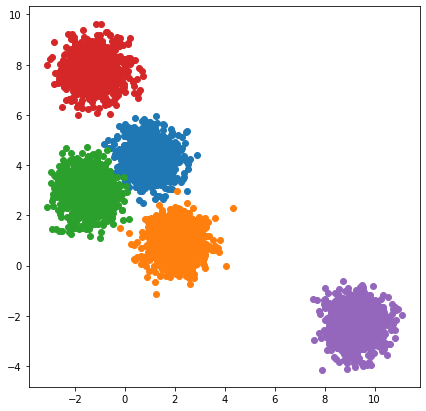

In [6]:
plt.figure(figsize=(7,7))
# plt.subplot(2,1,1)
for i in range(k):
    plt.scatter(ls[i][0], ls[i][1])
plt.show()

# 保存随机生成的数据文件

In [7]:
df[[0,1]].to_csv("data.csv", encoding="utf_8_sig", header=None, index=None)

# 测试 ball k-means 的有效性

## 先用 ball k-means源码 训练得到结果

In [8]:
y = pd.read_table('./test_results.txt',header=None)
# df = pd.read_csv('./dataframe.csv', header=None)

In [9]:
df[2] = y

In [10]:
# df

,0,1,2
0,-1.343588,7.526985,0
1,2.033309,0.847130,4
2,0.806953,3.608865,3
3,1.063585,1.537220,4
4,1.295462,0.860767,4
...,...,...,...
4995,-1.824005,8.233492,0
4996,-2.796471,7.662661,0
4997,1.960884,1.063408,4
4998,10.240851,-2.454124,2


## ball k-means算法结果可视化

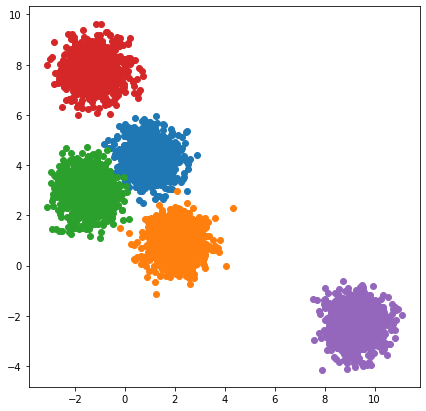

In [11]:
plt.figure(figsize=(7,7))
# plt.subplot(2,1,1)
for i in range(k):
    plt.scatter(ls[i][0], ls[i][1])
plt.show()